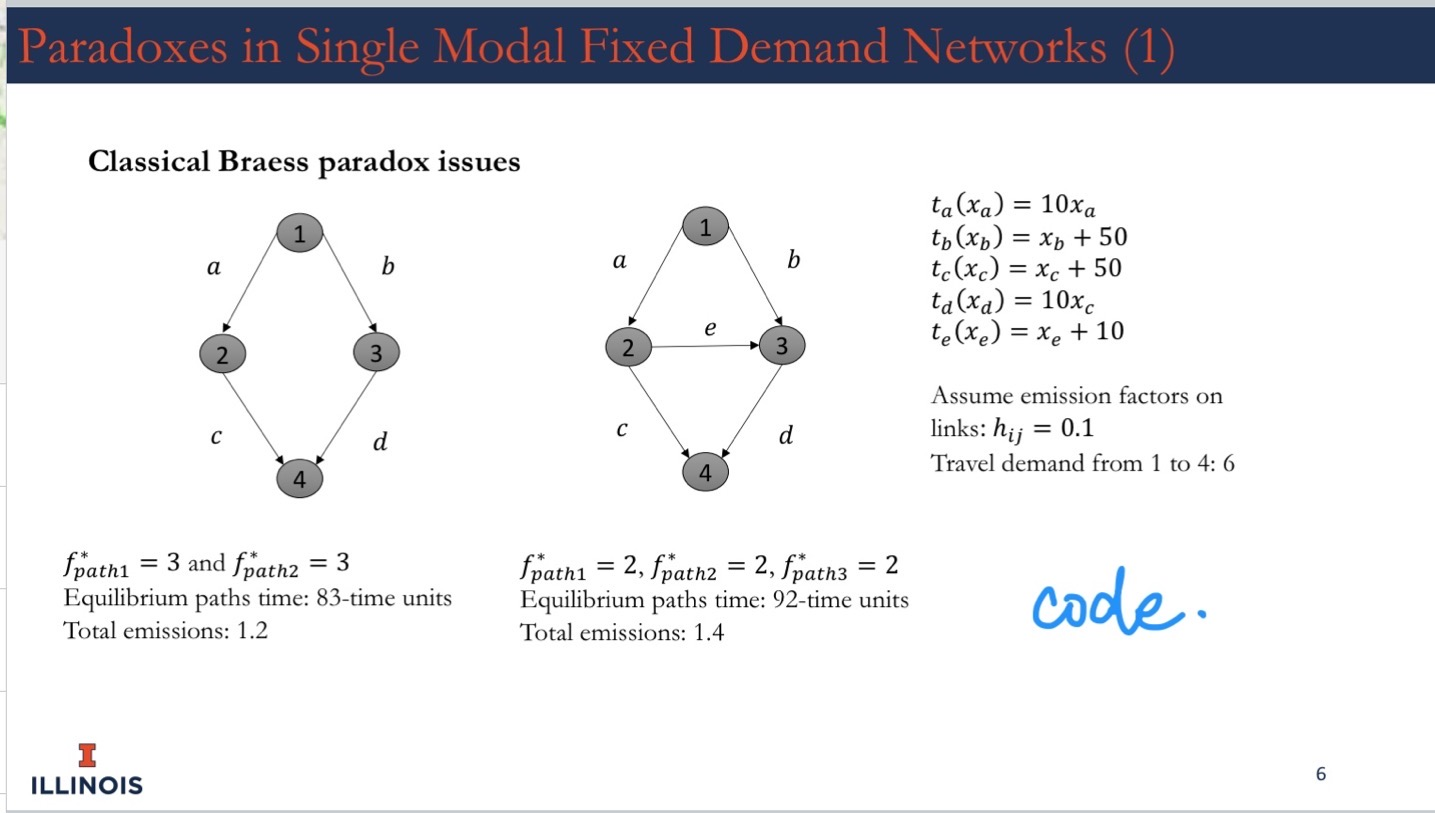

In [5]:
from IPython.display import Image
import numpy as np
from scipy.optimize import minimize
Image(filename = './Paradoxes 1.jpg')

Reference: Lecture 18 P6

### For the left one:
$\min Z(x)=5x_a^2 + 0.5x_b^2+50x_b + 0.5x_c^2+50x_c+ 5x_d^2$ \
s.t. \
$f_{1-2-4}+f_{1-3-4}=6$ \
$x_a=f_{1-2-4}$ \
$x_b=f_{1-3-4}$ \
$x_c=f_{1-2-4}$ \
$x_d=f_{1-3-4}$ \
$f_{1-2-4}, f_{1-3-4} \geq 0$ \
$x_a,x_b,x_c,x_d \geq 0$

In [20]:
def objective(x):
    x1 = x[0] #x_a
    x2 = x[1] #x_b
    x3 = x[2] #x_c
    x4 = x[3] #x_d
    x5 = x[4] #f_{1-2-4}
    x6 = x[5] #f_{1-3-4}
    return 5*x[0]**2 + 50*x[1]+0.5*x[1]**2 + 50*x[2]+0.5*x[2]**2 + 5*x[3]**2

def constraint1(x):
    return x[4]+x[5]-6

def constraint2(x):
    return x[0]-x[4]

def constraint3(x):
    return x[1]-x[5]

def constraint4(x):
    return x[2]-x[4]

def constraint5(x):
    return x[3]-x[5]

def equ_time(x): 
    return 10*x[0]+50+x[2]

def emi(x):
    return 0.1*(x[1]+x[0]+x[2]+x[3])

In [21]:
bnds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]
cons = [{'type': 'eq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2},
        {'type': 'eq', 'fun': constraint3},
        {'type': 'eq', 'fun': constraint4},
        {'type': 'eq', 'fun': constraint5}]
x_ini = [0,0,0,0,0,0]

In [22]:
res = minimize(objective, x_ini, constraints=cons, bounds=bnds, tol=0.0001)
res.x

array([2.99999942, 3.00000058, 2.99999942, 3.00000058, 2.99999942,
       3.00000058])

In [23]:
res.fun

399.0000000000037

In [24]:
print('$f_{path1}^*=',res.x[0])
print('$f_{path2}^*=',res.x[1])
print("Equilibrium paths time: ", equ_time(res.x))
print("Total emissions: ", emi(res.x))

$f_{path1}^*= 2.9999994171990325
$f_{path2}^*= 3.000000582800966
Equilibrium paths time:  82.99999358918936
Total emissions:  1.2000000000000002


### For the right one (adding a link):
$\min Z(x)=5x_a^2 + 0.5x_b^2+50x_b + 0.5x_c^2+50x_c+ 5x_d^2 + 0.5x_e^2+10x_e$ \
s.t. \
$f_{1-2-4}+f_{1-3-4}+f_{1-2-3-4}=6$ \
$x_a=f_{1-2-4}+f_{1-2-3-4}$ \
$x_b=f_{1-3-4}$ \
$x_c=f_{1-2-4}$ \
$x_d=f_{1-3-4}+f_{1-2-3-4}$ \
$x_e=f_{1-2-3-4}$ \
$f_{1-2-4}, f_{1-3-4},f_{1-2-3-4} \geq 0$ \
$x_a,x_b,x_c,x_d,x_e \geq 0$

In [35]:
def objective(x):
    x1 = x[0] #x_a
    x2 = x[1] #x_b
    x3 = x[2] #x_c
    x4 = x[3] #x_d
    x5 = x[4] #f_{1-2-4}
    x6 = x[5] #f_{1-3-4}
    x7 = x[6] #x_e
    x8 = x[7] #f_{1-2-3-4}
    return 5*x[0]**2 + 50*x[1]+0.5*x[1]**2 + 50*x[2]+0.5*x[2]**2 + 5*x[3]**2+0.5*x[6]**2+10*x[6]

def constraint1(x):
    return x[4]+x[5]+x[7]-6

def constraint2(x):
    return x[0]-x[4]-x[7]

def constraint3(x):
    return x[1]-x[5]

def constraint4(x):
    return x[2]-x[4]

def constraint5(x):
    return x[3]-x[5]-x[7]

def constraint6(x):
    return x[6]-x[7]

def equ_time(x): 
    return 10*x[0]+50+x[2]

def emi(x):
    return 0.1*(x[1]+x[0]+x[2]+x[3]+x[6])

In [36]:
bnds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]
cons = [{'type': 'eq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2},
        {'type': 'eq', 'fun': constraint3},
        {'type': 'eq', 'fun': constraint4},
        {'type': 'eq', 'fun': constraint5},
        {'type': 'eq', 'fun': constraint6}]
x_ini = [0,0,0,0,0,0,0,0]

In [37]:
res = minimize(objective, x_ini, constraints=cons, bounds=bnds, tol=0.0001)
res.x

array([3.99999903, 2.00000097, 1.99999946, 4.00000054, 1.99999946,
       2.00000097, 1.99999957, 1.99999957])

In [38]:
res.fun

386.0000000000069

In [39]:
print('$f_{path1}^*=',res.x[0]-res.x[6])
print('$f_{path2}^*=',res.x[1])
print('$f_{path2}^*=',res.x[6])
print("Equilibrium paths time: ", equ_time(res.x))
print("Total emissions: ", emi(res.x))

$f_{path1}^*= 1.9999994609628333
$f_{path2}^*= 2.0000009725113044
$f_{path2}^*= 1.9999995665258623
Equilibrium paths time:  91.9999897358498
Total emissions:  1.3999999566525863
